# Self-Driving Car Engineer Nanodegree


## Project: **Vehicle Detection and Tracking** 
***

## Image Reading

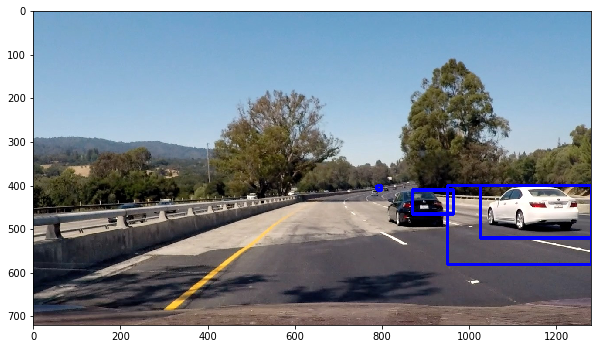

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import os
import errno
import glob

%matplotlib inline
img = mpimg.imread('./test_images/test4.jpg')
cv2.rectangle(img, (1025, 400), (1280,520), (0,0,255),6) # frame245 255x120 2.125
cv2.rectangle(img, (950, 400), (1280,580), (0,0,255),6) # frame745 330x180 1.833
cv2.rectangle(img, (870, 410), (965,465), (0,0,255),6) # frame745 95x55 1.727
cv2.rectangle(img, (788, 400), (800,410), (0,0,255),6) # frame745 12x10 1.727

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img)
img = cv2.imread('./test_images/test4.jpg')
#crop_img = img[360:660, 400:1280]
#plt.imshow(crop_img)

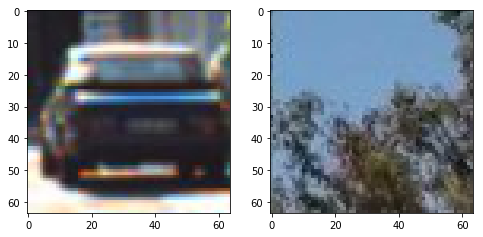

In [13]:
img1 = mpimg.imread('./data/vehicles_smallset/1.jpeg')
img2 = mpimg.imread('./data/non-vehicles_smallset/extra01.jpeg')

fig = plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img1) 
plt.subplot(122)
plt.imshow(img2) 

## Lesson function

In [2]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
import random

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis, feature_vec):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size):
    features = cv2.resize(img, size).ravel() 
    return features

def color_hist(img, nbins, bins_range=(0, 256)):
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    return hist_features

def extract_features(imgs, color_space, spatial_size, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    features = []
    for file in imgs:
        file_features = []
        image = mpimg.imread(file)
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)

            file_features.append(hog_features)
        features.append(np.concatenate(file_features))

    return features

def draw_boxes(img, bboxes, color, thick=6):
    imcopy = np.copy(img)
    for bbox in bboxes:
        r1 = random.randint(0,255)
        r2 = random.randint(0,255)
        r3 = random.randint(0,255)
        cv2.rectangle(imcopy, bbox[0], bbox[1], (r1,r2,r3), thick)
        #cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy


def single_img_features(img, color_space, spatial_size, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    

    img_features = []

    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      

    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        img_features.append(spatial_features)

    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        img_features.append(hist_features)

    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            
        img_features.append(hog_features)

    return np.concatenate(img_features)

def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    on_windows = []
    for window in windows:
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        prediction = clf.predict(test_features)
        if prediction == 1:
            on_windows.append(window)
    return on_windows
    
def slide_window(img, x_start_stop, y_start_stop, xy_window, xy_overlap):
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    window_list = []
    
    for i in range(5):
        nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
        ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))

        nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
        ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
        nx_windows = np.int((xspan - nx_buffer)/nx_pix_per_step)
        ny_windows = np.int((yspan - ny_buffer)/ny_pix_per_step) 

        for ys in range(ny_windows):
            for xs in range(nx_windows):
                startx = xs*nx_pix_per_step + x_start_stop[0]
                endx = startx + xy_window[0]

                starty = ys*ny_pix_per_step + y_start_stop[0]
                endy = starty + xy_window[1]

                window_list.append(((startx, starty), (endx, endy)))
                
        xy_window = list(xy_window)
        xy_window[0] = np.int(1.5*np.asarray(xy_window[0]))
        xy_window[1] = np.int(1.5*np.asarray(xy_window[1]))
        xy_window = tuple(xy_window)
                
#        nx_buffer = nx_buffer + np.int(30*(xy_overlap[0]))
#        ny_buffer = ny_buffer + np.int(20*(xy_overlap[1]))
#        nx_pix_per_step = nx_pix_per_step + 30
#        ny_pix_per_step = ny_pix_per_step + 20
#        nx_windows = np.int((xspan - nx_buffer)/nx_pix_per_step)
#        ny_windows = np.int((yspan - ny_buffer)/ny_pix_per_step) 
        
    return window_list
    
print("Done")

Done


## Train SVC

In [55]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

# Read in cars and notcars
cars_img = glob.glob('./data/vehicles_smallset/*.jpeg')
notcars_img = glob.glob('./data/non-vehicles_smallset/*.jpeg')
cars = []
notcars = []

for image in cars_img:
    cars.append(image)

for image in notcars_img:
    notcars.append(image)

print("cars: "+str(len(cars_img)), "notcars: "+str(len(notcars_img)))
    
#sample_size = 600
#cars = cars[0:sample_size]
#notcars = notcars[0:sample_size]

color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16)
hist_bins = 32
spatial_feat = True
hist_feat = True
hog_feat = True

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
    
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

car_scaler = StandardScaler().fit(car_features)
car_scaled = car_scaler.transform(car_features)
notcar_scaler = StandardScaler().fit(notcar_features)
notcar_scaled = notcar_scaler.transform(notcar_features)
print("Done")

cars: 1196 notcars: 1125
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2628
0.46 Seconds to train SVC...
Test Accuracy of SVC =  0.9935
Done


(2628,)
uint8 int64 float64
(3072,) (96,) (1764,)


Text(0.5,0,'Hog Feature')

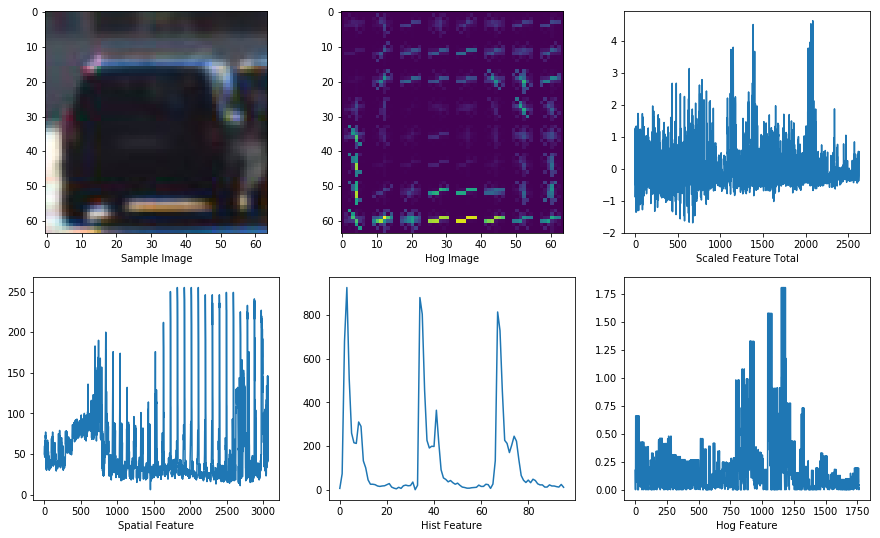

In [56]:
i = np.random.randint(0, len(car_features))
j = np.random.randint(0, len(notcar_features))

#img = mpimg.imread('./data/vehicles_smallset/1.jpeg')
img = mpimg.imread(cars[i])
#img = mpimg.imread(notcars[j])
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16)
hist_bins = 32

ft_img = single_img_features(img, color_space, spatial_size, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel,
                        spatial_feat=True, hist_feat=True, hog_feat=True)

spat_ft = bin_spatial(img, size=(32,32))
hist_ft = color_hist(img, nbins=32, bins_range=(0, 256))
hog_ft, hog_img = get_hog_features(gray, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=True)

print(car_features[0].shape)

print(np.dtype(spat_ft[0]), np.dtype(hist_ft[0]), np.dtype(hog_ft[0]))
print(spat_ft.shape, hist_ft.shape, hog_ft.shape)

fig = plt.figure(figsize=(15, 9))
plt.subplot(231)
plt.imshow(img)    #mpimg.imread(cars[i]))
plt.xlabel('Sample Image')
plt.subplot(232)
plt.imshow(hog_img)
plt.xlabel('Hog Image')
plt.subplot(233)
plt.plot(car_scaled[i])
plt.xlabel('Scaled Feature Total')
plt.subplot(234)
plt.plot(spat_ft)
plt.xlabel('Spatial Feature')
plt.subplot(235)
plt.plot(hist_ft)
plt.xlabel('Hist Feature')
plt.subplot(236)
plt.plot(hog_ft)
plt.xlabel('Hog Feature')

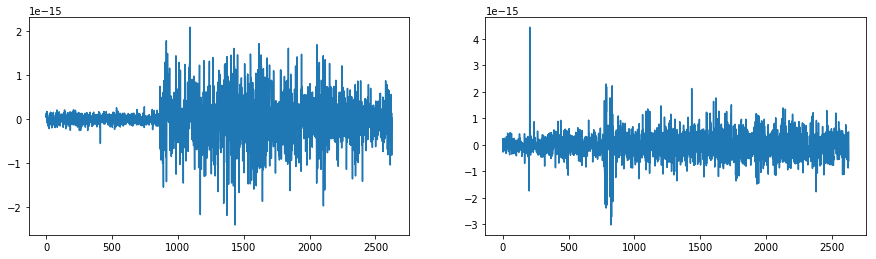

In [57]:
import numpy as np
def ft_avg(features):
    vector = np.zeros_like(features[0])
    for ft in features:
        vector += np.array(ft)
        
    avgs = [x/len(features) for x in vector]
    return avgs
car_ft_avg = ft_avg(car_scaled)
notcar_ft_avg = ft_avg(notcar_scaled)

#car_ft_avg = ft_avg(car_features)
#notcar_ft_avg = ft_avg(notcar_features)

fig = plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(car_ft_avg)
plt.subplot(122)
plt.plot(notcar_ft_avg)

## Search & Classify

583


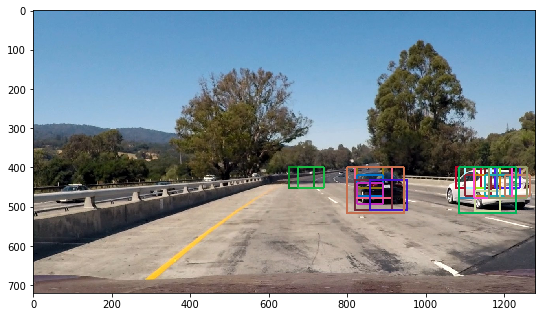

In [58]:
image = mpimg.imread('./test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

#x_start_stop = [400, 1280]
#y_start_stop = [400, 500]

windows = slide_window(image, x_start_stop=[400, 1280], y_start_stop=[400, 650], 
                    xy_window=(64, 48), xy_overlap=(0.6, 0.6))
#windows2 = slide_window(image, x_start_stop=[400, 1280], y_start_stop=[400, 650], 
#                    xy_window=(96, 64), xy_overlap=(0.6, 0.6))
#windows3 = slide_window(image, x_start_stop=[400, 1280], y_start_stop=[400, 650], 
#                    xy_window=(144, 96), xy_overlap=(0.6, 0.6))

# frame245 255x120 2.125
# frame745 330x180 1.833
# frame745 95x55 1.727
# frame745 12x10 1.727
print(len(windows))
windows = slide_window(image, x_start_stop=[400, 1280], y_start_stop=[400, 650], 
                    xy_window=(64, 52), xy_overlap=(0.6, 0.6))
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=3)                    
#window_img = draw_boxes(draw_image, windows, color=(0, 0, 255), thick=3) 
fig = plt.figure(figsize=(9, 6))
plt.imshow(window_img)

## Heat Map

10.0 2


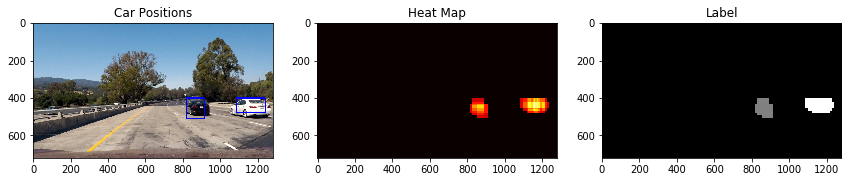

In [59]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
#box_list = pickle.load( open( "bbox_pickle.p", "rb" ))
box_list = hot_windows
# Read in image similar to one shown above 
image = mpimg.imread('./test_images/test1.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap
    
def apply_threshold(heatmap, threshold):
    heatmap[heatmap <= threshold] = 0
    return heatmap

def draw_labeled_bboxes(img, labels):
    for car_number in range(1, labels[1]+1):
        nonzero = (labels[0] == car_number).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    return img

heat = add_heat(heat,box_list)
heat = apply_threshold(heat,2)   
heatmap = np.clip(heat, 0, 255)

labels  = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)
#print(np.dtype(heatmap[0]), np.dtype(heatmap[0]), np.dtype(labels[0]), np.dtype(labels[0]))
print(np.amax(heatmap), labels[1]) #, np.dtype(labels).shape)
np.savetxt('output.txt', labels[0], fmt='%d', delimiter=',')

fig = plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(132)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
plt.subplot(133)
plt.imshow(labels[0], cmap='gray')
plt.title('Label')
fig.tight_layout()


## Pipeline & Output

In [60]:
def pipeline(image):
    windows = slide_window(image, x_start_stop=[400, 1280], y_start_stop=[400, 650], 
                        xy_window=(64, 48), xy_overlap=(0.6, 0.6))
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=3)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat,hot_windows)
    heat = apply_threshold(heat,3)
    heatmap = np.clip(heat, 0, 255)*255/12
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img

from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os

output = 'test_videos_output/project_video.mp4'

clip = VideoFileClip("project_video.mp4")
processed_clip = clip.fl_image(pipeline)

os.makedirs(os.path.dirname(output), exist_ok=True)
%time processed_clip.write_videofile(output, audio=False)
processed_clip.reader.close()
processed_clip.audio.reader.close_proc()
print("done")
HTML("""
<video width="480" height="270" controls>
  <source src="{0}">
</video>
""".format(output))

[MoviePy] >>>> Building video test_videos_output/project_video.mp4
[MoviePy] Writing video test_videos_output/project_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [42:46<00:02,  2.08s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/project_video.mp4 

Wall time: 42min 48s
done
